In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('realistic_ecommerce_sales_data.csv')

In [5]:
df.head(3)

,OrderID,OrderDate,CustomerID,Product,Category,Region,Quantity,Price,Total
0,1,2024-11-15,Customer_021,Headphones,Electronics,Asia,3,6.74,20.22
1,2,2024-07-13,Customer_044,Smartphone,Books,Australia,2,101.55,203.10
2,3,2024-09-21,Customer_001,Novel,Books,South America,4,424.33,1697.32


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     1000 non-null   int64  
 1   OrderDate   1000 non-null   object 
 2   CustomerID  1000 non-null   object 
 3   Product     1000 non-null   object 
 4   Category    1000 non-null   object 
 5   Region      1000 non-null   object 
 6   Quantity    1000 non-null   int64  
 7   Price       1000 non-null   float64
 8   Total       1000 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


In [13]:
df.isnull().sum()


OrderID       0
OrderDate     0
CustomerID    0
Product       0
Category      0
Region        0
Quantity      0
Price         0
Total         0
dtype: int64

In [18]:
duplicados = df[df.duplicated()]

print(duplicados)

Empty DataFrame
Columns: [OrderID, OrderDate, CustomerID, Product, Category, Region, Quantity, Price, Total]
Index: []


In [24]:
df.describe()

,OrderID,Quantity,Price,Total
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4.876000,246.649290,1222.327860
std,288.819436,2.613322,140.852715,1034.802656
min,1.000000,1.000000,5.730000,11.390000
25%,250.750000,2.000000,126.160000,372.005000
50%,500.500000,5.000000,244.720000,906.130000
75%,750.250000,7.000000,367.917500,1825.230000
max,1000.000000,9.000000,499.980000,4355.190000


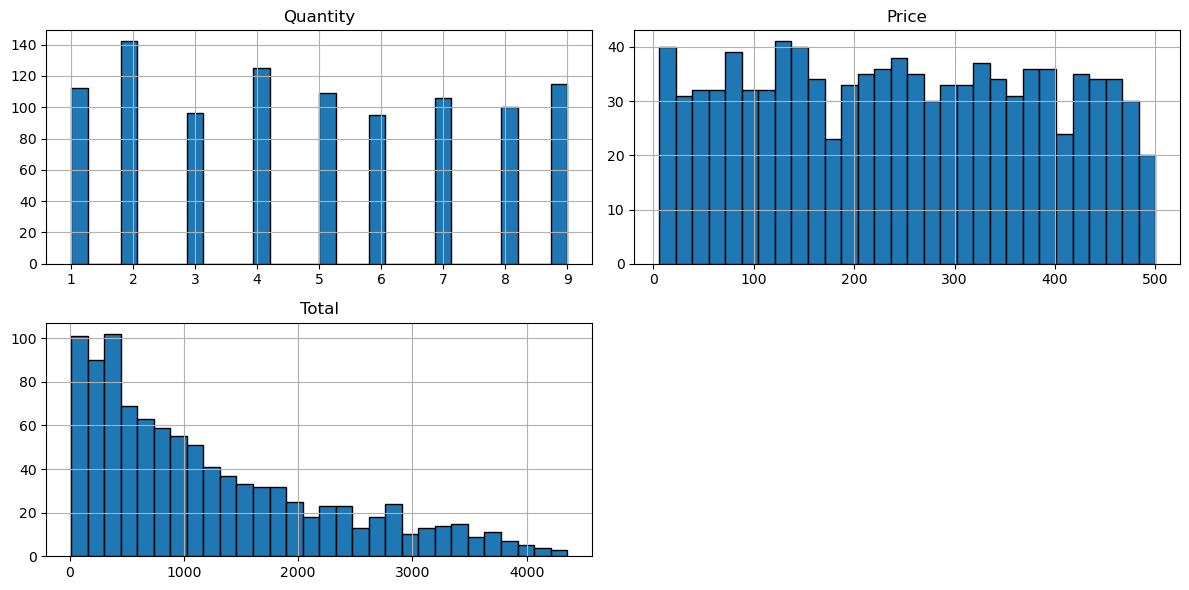

In [36]:
# Histograma das variáveis numéricas
df[['Quantity', 'Price', 'Total']].hist(figsize=(12, 6), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


In [38]:
# Contagem das variáveis categóricas
for col in ['CustomerID', 'Product', 'Category', 'Region']:
    print(f'{col}:')
    print(df[col].value_counts())
    print()


CustomerID:
CustomerID
Customer_017    30
Customer_030    30
Customer_037    28
Customer_018    28
Customer_039    26
Customer_049    25
Customer_038    24
Customer_008    24
Customer_020    24
Customer_016    24
Customer_002    24
Customer_006    23
Customer_033    22
Customer_048    22
Customer_029    21
Customer_031    21
Customer_013    21
Customer_005    21
Customer_012    20
Customer_022    20
Customer_024    20
Customer_023    20
Customer_019    20
Customer_050    20
Customer_004    20
Customer_015    19
Customer_028    19
Customer_035    19
Customer_021    19
Customer_025    19
Customer_045    19
Customer_034    19
Customer_043    18
Customer_014    18
Customer_026    18
Customer_040    18
Customer_001    18
Customer_027    18
Customer_011    18
Customer_046    17
Customer_036    17
Customer_003    17
Customer_047    16
Customer_041    16
Customer_010    14
Customer_032    14
Customer_044    14
Customer_007    14
Customer_009    13
Customer_042    11
Name: count, dtype: int64



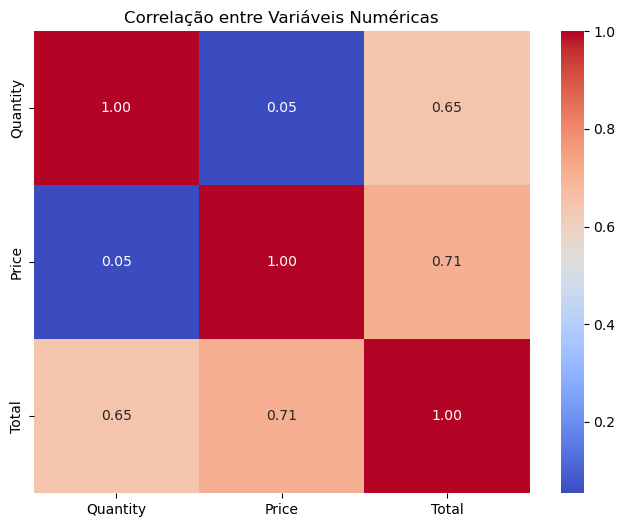

In [40]:
# Matriz de correlação
corr = df[['Quantity', 'Price', 'Total']].corr()

# Mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()


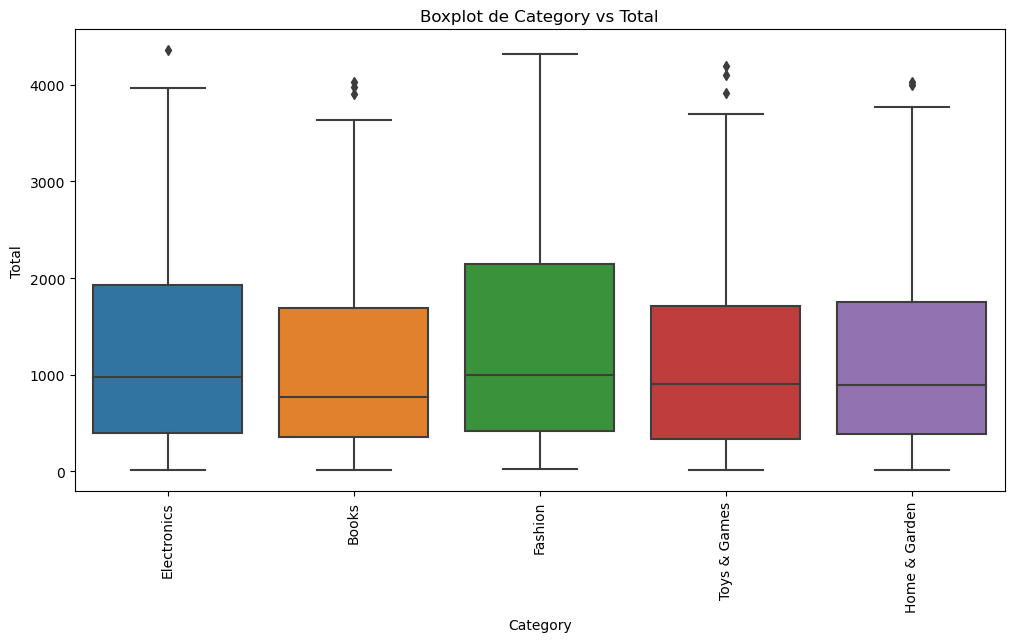

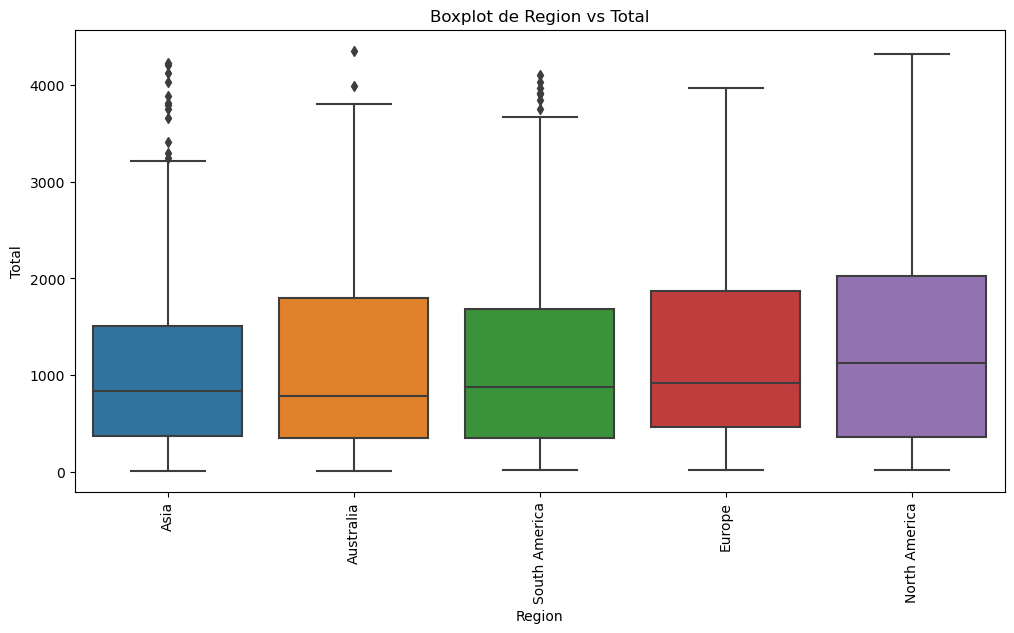

In [42]:
# Boxplot para variáveis categóricas vs variáveis numéricas
for col in ['Category', 'Region']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='Total', data=df)
    plt.title(f'Boxplot de {col} vs Total')
    plt.xticks(rotation=90)
    plt.show()


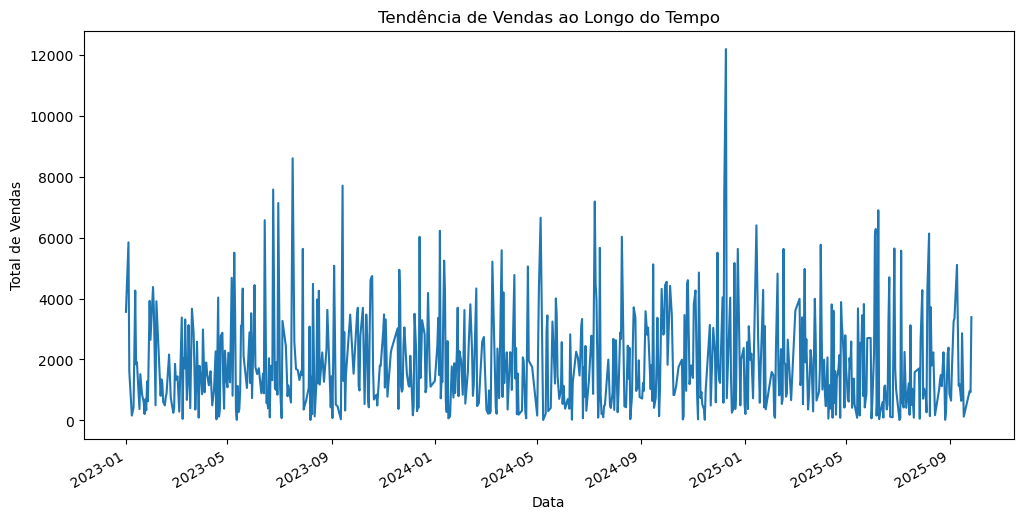

In [44]:
# Converter OrderDate para datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Tendência do Total de Vendas ao longo do tempo
plt.figure(figsize=(12, 6))
df.groupby('OrderDate')['Total'].sum().plot()
plt.title('Tendência de Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.show()


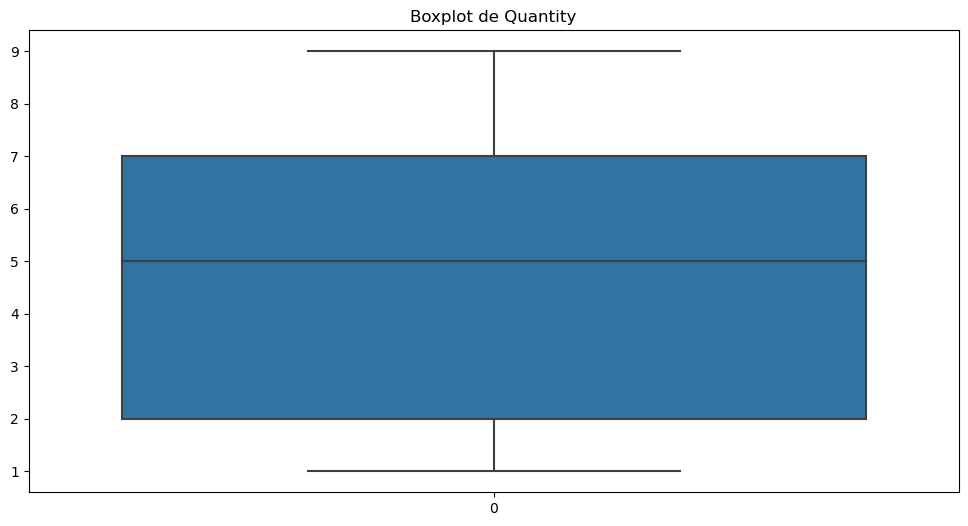

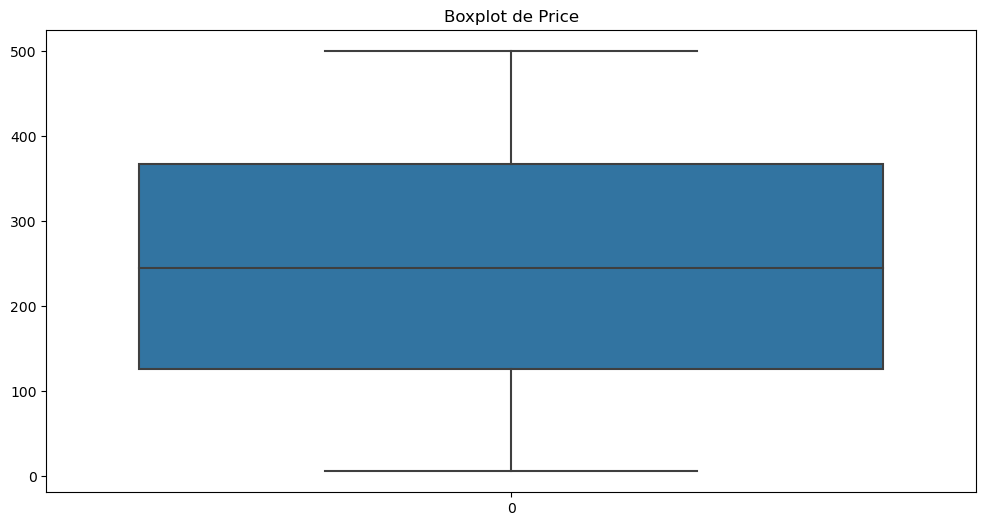

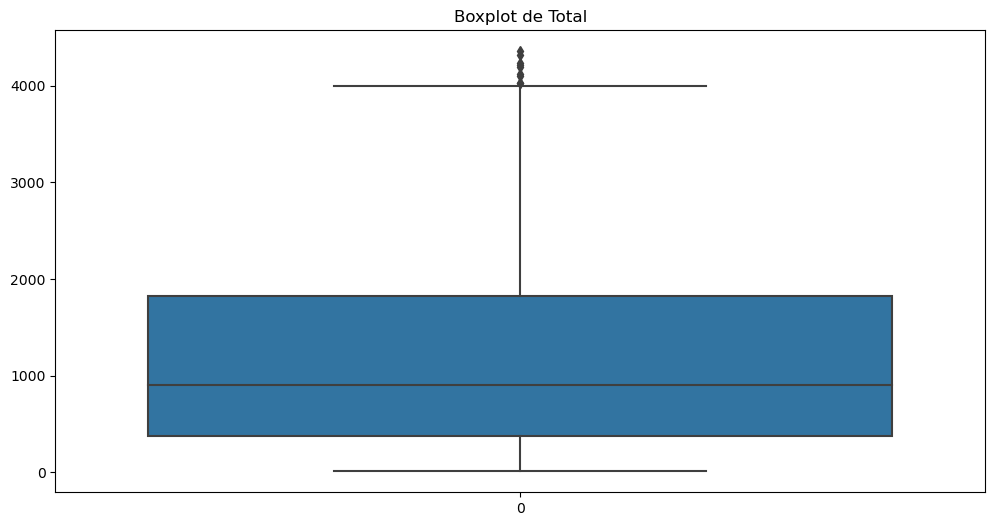

In [46]:
# Boxplot para variáveis numéricas
for col in ['Quantity', 'Price', 'Total']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


In [50]:
#  contagem de valores únicos em uma coluna
print("Resumo dos principais achados:")
print(df['Category'].value_counts())
print(df['Region'].value_counts())


Resumo dos principais achados:
Category
Electronics      208
Books            207
Toys & Games     199
Fashion          193
Home & Garden    193
Name: count, dtype: int64
Region
North America    215
Australia        202
Europe           199
Asia             196
South America    188
Name: count, dtype: int64


In [63]:
df.to_csv('Portfolio.csv', index=False)
